## Завдання

Використовуючи модель ARIMA і датасет Yearly sunspots data 1700-2008 побудуйте прогноз на 2009-2030 р.р.

Детальніше про даний датасет:
https://www.statsmodels.org/dev/datasets/generated/sunspots.html

Імпорт датасету:
statsmodels.api.datasets.sunspots.load_pandas()

## Розв'язок

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#### Завантажуємо наш датасет

Щорічні (1700-2008) дані про сонячні плями з Національного центру геофізичних даних.

In [2]:
df = sm.datasets.sunspots.load_pandas().data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


SUNACTIVITY - кількість сонячних плям за кожен рік

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


Пропущених значень немає

#### Створюємо візуалізацію наших даних

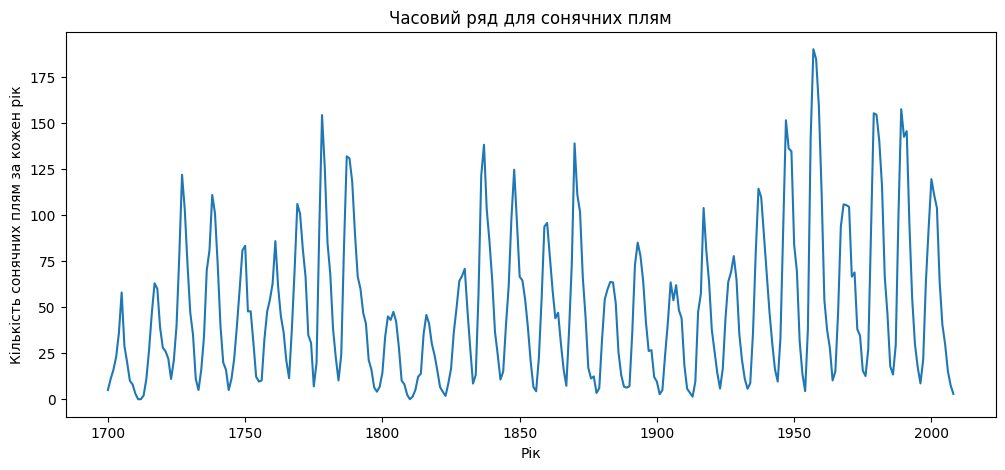

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['YEAR'],df['SUNACTIVITY'])
plt.xlabel('Рік')
plt.ylabel('Кількість сонячних плям за кожен рік')
plt.title('Часовий ряд для сонячних плям')
plt.show()

#### Перевіряємо автокореляцію та часткову автокореляцію

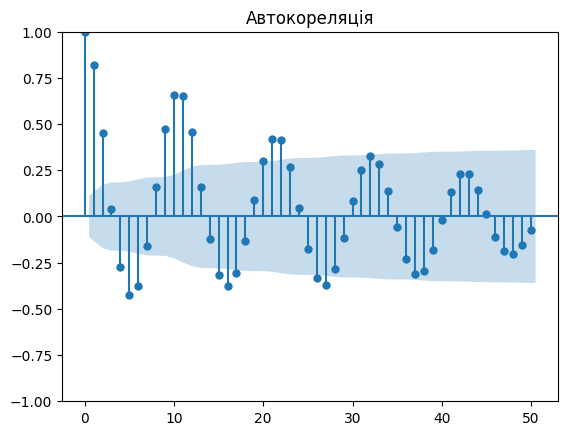

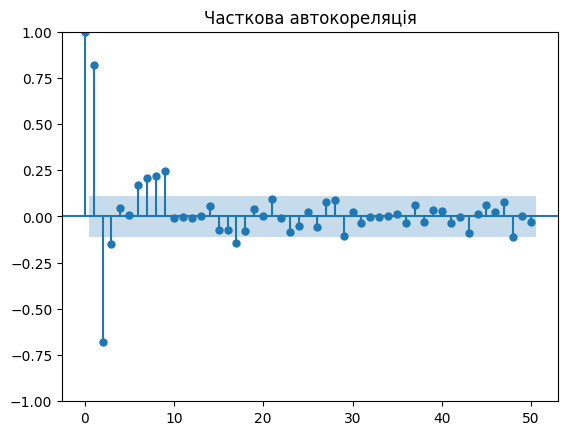

In [5]:
plot_acf(df['SUNACTIVITY'], lags=50)
plt.title('Автокореляція')
plt.show()

plot_pacf(df['SUNACTIVITY'], lags=50, method='ywm')
plt.title('Часткова автокореляція')
plt.show()

#### Підбір параметрів для моделі ARIMA

In [6]:
model = auto_arima(df['SUNACTIVITY'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2577.488, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=0.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

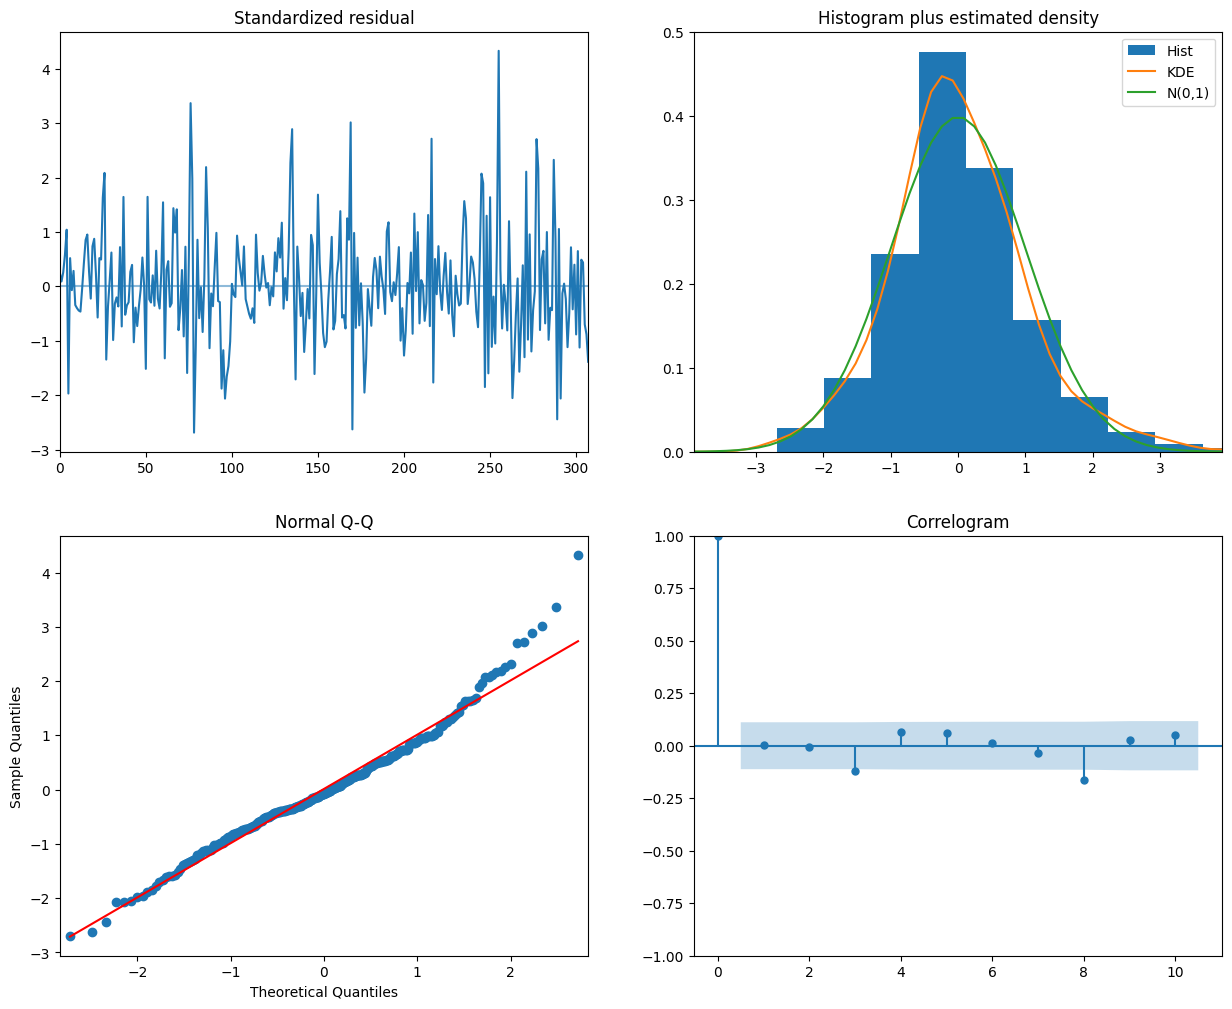

In [96]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

##### Ми визначили, що найкраща модель:  ARIMA(2,1,3)(0,0,0)[0]   

#### Прогнозування часових рядів

In [32]:
# Ділимо наш датасет на тренувальну та тестувальну частини
train = df.iloc[:-12]
test = df.iloc[-12:]

In [33]:
# Навчаємо нашу модель
model = ARIMA(train['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()

In [34]:
# Прогнозуємо значення для тестового періоду
forecast = model_fit.forecast(len(test), alpha=0.05)

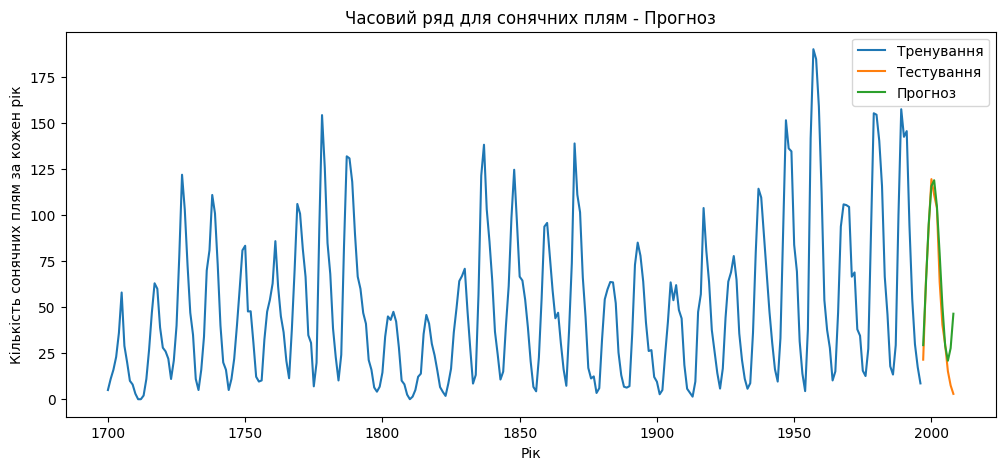

In [35]:
# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(12,5))
plt.plot(train['YEAR'],train['SUNACTIVITY'], label='Тренування')
plt.plot(test['YEAR'],test['SUNACTIVITY'], label='Тестування')
plt.plot(test['YEAR'],forecast, label='Прогноз')
plt.xlabel('Рік')
plt.ylabel('Кількість сонячних плям за кожен рік')
plt.title('Часовий ряд для сонячних плям - Прогноз')
plt.legend()
plt.show()

In [36]:
# Прогнозуємо значення на тестовий період
forecast = model_fit.forecast(len(test), alpha=0.05)

In [37]:
# Визначаємо MAE (Mean Absolute Error) - середня абсолютна похибка
mae = mean_absolute_error(test['SUNACTIVITY'], forecast)
print('MAE:', mae)

MAE: 9.96971066202916


In [38]:
# Визначаємо MSE (Mean Squared Error) - середня квадратична похибка
rmse = np.sqrt(mean_squared_error(test['SUNACTIVITY'], forecast))
print('MSE:', rmse)

MSE: 15.357978131302591


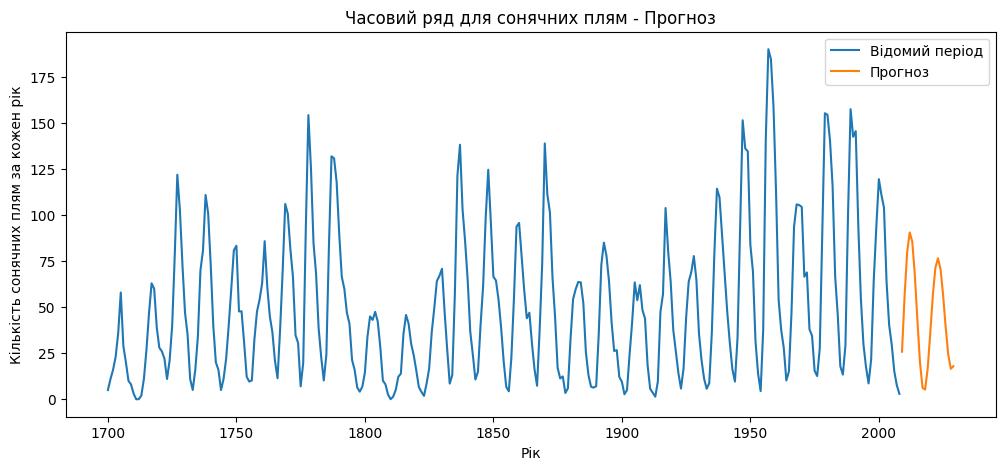

In [47]:
# Прогнозуємо показники до 2030 року
model = ARIMA(df['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(21, alpha=0.05)

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(12,5))
plt.plot(df['YEAR'], df['SUNACTIVITY'], label='Відомий період')
plt.plot(pd.Series(range(2009,2030)), forecast, label='Прогноз')
plt.xlabel('Рік')
plt.ylabel('Кількість сонячних плям за кожен рік')
plt.title('Часовий ряд для сонячних плям - Прогноз')
plt.legend()
plt.show()

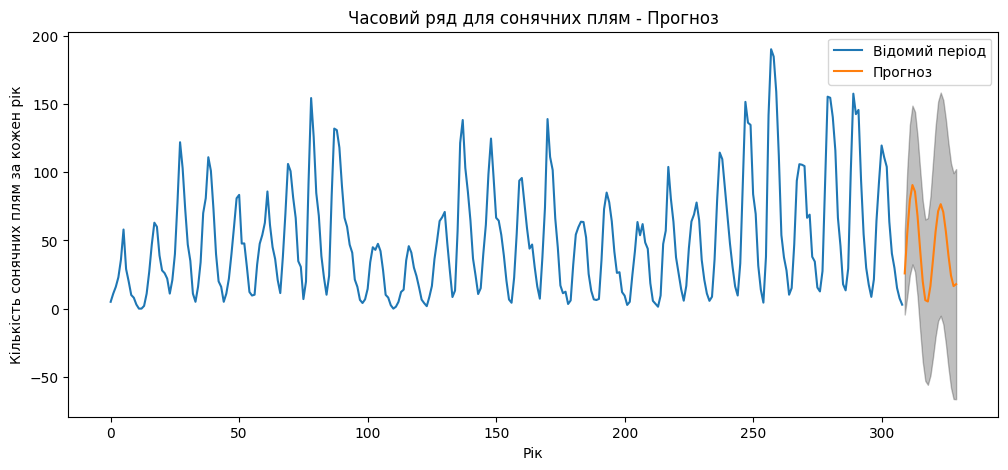

In [48]:
# Прогнозуємо показники до 2030 року
pred_uc = model_fit.get_forecast(steps=21)
pred_ci = pred_uc.conf_int()

# Візуалізація прогнозу та реальних значень
ax = df['SUNACTIVITY'].plot(label='Відомий період', figsize=(12, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.xlabel('Рік')
plt.ylabel('Кількість сонячних плям за кожен рік')
plt.title('Часовий ряд для сонячних плям - Прогноз')
plt.legend()
plt.show()